#Лабораторна робота №3. Зниження розмірності набору даних, отримання суттєвих ознак (feature extraction)


**Виконала** студентка групи КІ-41мп Додонова Марія.

##Завдання

1. Опрацювати матеріали уроків U-6, U-7, U-8.
2. Обрати одну з наступних задач та відповідно набір даних з багатьма ознаками:
* Зменшення розмірності табличних даних.
* Усунення шумів у зображеннях і реконструкція зображень. Оцінювання джерел із зашумлених вимірів.
* Отримання ознак (feature extraction) із наборів зображень.
* Отримання тем з наборів тексту (topic extraction).

Дані для навчання можна обрати з репозиторію машинного навчання UCI:  https://archive.ics.uci.edu/datasets.

3. Виконати зниження розмірності набору даних, отримати суттєві ознаки (feature extraction), усунути шуми та ін. (залежно від обраної задачі), використовуючи декілька алгоритмів, реалізованих в scikit-learn python, з наступного переліку:
* Метод головних компонент (PCA)   
* Зростаючий метод головних компонент (Incremental PCA)
* PCA з рандомізованим розкладом за власними числами (singular value decomposition, SVD)
* Розріджений метод головних компонент (SparsePCA та MiniBatchSparsePCA)
* Ядерний метод головних компонент (Kernel PCA)
* Усічений SVD і скритий семантичний аналіз (Truncated singular value decomposition and latent semantic analysis)
* Словникове навчання (Dictionary Learning та MiniBatchDictionaryLearning)
* Факторний аналіз (Factor Analysis, FA)
* Аналіз незалежних компонент (Independent component analysis, ICA)
* Метод матричної факторизації (Non-negative matrix factorization (NMF або NNMF))
* Скритий розподіл Дирихле (Latent Dirichlet Allocation, LDA)
* Лінійний та квадратичний дискримінантний аналіз (Linear and Quadratic Discriminant Analysis) - задача навчання з вчителем.
4. Виконати зниження розмірності набору даних, отримати суттєві ознаки (feature extraction), усунути шуми та ін. (залежно від обраної задачі), використовуючи
* Автокодувальник з лінійними функціями активації.
* Автокодувальник з нелінійними функціями активації.
5. Порівняти результати за різними алгоритмами. Для обраної задачі використати всі наведені вище алгоритми.

Вказати які алгоритми дають кращі результати на обраному наборі даних. Чи є результати на основі автокодувальника з лінійними функціями активації близькими до результатів на основі методу PCA та інших з п.3?

6. Зробити висновки.

##Виконання роботи

###Вибір задачі та набору даних

Оберемо задачу зменшення розмірності табличних даних та набір даних з 21 ознакою Waveform Database Generator (Version 1) з репозиторію машинного навчання UCI: https://archive.ics.uci.edu/datasets.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/waveform/waveform.data.Z
!uncompress waveform.data.Z

--2025-03-18 18:10:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/waveform/waveform.data.Z
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘waveform.data.Z’

waveform.data.Z         [  <=>               ] 172.76K   784KB/s    in 0.2s    

2025-03-18 18:10:44 (784 KB/s) - ‘waveform.data.Z’ saved [176908]

gzip: waveform.data already exists; do you wish to overwrite (y or n)? y


In [ ]:
import pandas as pd

column_names = [f"Attribute{i}" for i in range(1, 22)] + ["class"]
df = pd.read_csv("waveform.data", header=None, names=column_names)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


Розіб'ємо частину набору (1000 рядків) на навчальнний (70% даних) та тестовий (30% даних) піднабори. Виконаємо стандартизацію ознак.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:1000, :-1].values, df.iloc[:1000, -1].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

# Feature standadization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Напишемо функції для побудови графіка поясненої та кумулятивної дисперсії, діаграми поверхні рішення та діаграми точності класифікації за результатами застосування різних алгоритмів.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_variance(explained_variance_ratio):
  indices = range(1, 22)

  plt.figure(figsize=(10, 6))

  # Plot explained variance
  plt.bar(
      indices, explained_variance_ratio, alpha=0.5,
      align="center", label="Individual explained variance"
  )

  # Plot cumulative explained variance
  plt.step(
      indices, np.cumsum(explained_variance_ratio),
      where="mid", label="Cumulative explained variance"
  )

  plt.title("Explained and Cumulative Variance")
  plt.ylabel("Explained variance ratio")
  plt.xlabel("Principal component index")
  plt.legend(loc="center right")
  plt.tight_layout()

  plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02,
                          title="Decision Regions"):
  # Set markers and colors
  markers = ("s", "x", "o", "^", "v")
  colors = ("red", "blue", "lightgreen", "gray", "cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # Plot examples by class
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.6, color=cmap(idx),
                marker=markers[idx], label=cl)

  plt.title(title)
  plt.xlabel("PC 1")
  plt.ylabel("PC 2")
  plt.legend(loc="lower left")
  plt.tight_layout()

  plt.show()

def plot_accuracy(algorithms, train_accuracies, test_accuracies):
  x = np.arange(len(algorithms))
  width = 0.4

  plt.figure(figsize=(10, 5))

  # Plot train and test accuracies
  plt.bar(x - width/2, train_accuracies, width=width,
          color="lightcoral", edgecolor="black", label="Train Accuracy")
  plt.bar(x + width/2, test_accuracies, width=width,
          color="skyblue", edgecolor="black", label="Test Accuracy")

  # Set y limits
  min_y = min(min(train_accuracies), min(test_accuracies)) - 0.01
  max_y = max(max(train_accuracies), max(test_accuracies)) + 0.01
  plt.ylim(min_y, max_y)

  plt.xticks(x, algorithms, rotation=45, ha="right")
  plt.grid(axis="y", linestyle="--", alpha=0.7)

  # Show accuracy values on the diagram
  for i in range(len(algorithms)):
    plt.text(x[i] - width/2, train_accuracies[i] + 0.002,
             f"{train_accuracies[i]:.3f}", ha="center", fontsize=9,
             fontweight="bold")
    plt.text(x[i] + width/2, test_accuracies[i] + 0.002,
             f"{test_accuracies[i]:.3f}", ha="center", fontsize=9,
             fontweight="bold")

  plt.title("Comparing Training and Testing Accuracies")
  plt.xlabel("Algorithm")
  plt.ylabel("Accuracy")
  plt.legend()

  plt.show()

Для перевірки та оцінки алгоритмів будемо використовувати функцію score_algorithm.

In [ ]:
from sklearn.metrics import accuracy_score

def score_algorithm(algorithm, classifier,
                    X_train, y_train, X_test, y_test,
                    plot=True, mode="default"):
  if mode == "lda":
    X_train_transformed = algorithm.fit_transform(X_train, y_train)
    X_test_transformed = algorithm.transform(X_test)
  elif mode == "encoder":
    X_train_transformed = algorithm.predict(X_train)
    X_test_transformed = algorithm.predict(X_test)
  elif mode == "baseline":
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
  else:
    X_train_transformed = algorithm.fit_transform(X_train)
    X_test_transformed = algorithm.transform(X_test)

  # Fit classifier
  classifier = classifier.fit(X_train_transformed, y_train)

  y_train_pred = classifier.predict(X_train_transformed)
  y_test_pred = classifier.predict(X_test_transformed)

  # Calculate and print accuracies
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  print(f"Train Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")

  # Plot decision regions
  if plot:
    plot_decision_regions(X_train_transformed, y_train,
                          classifier=classifier,
                          title="Decision Regions on Train Dataset")
    plot_decision_regions(X_test_transformed, y_test,
                          classifier=classifier,
                          title="Decision Regions on Test Dataset")

  return train_accuracy, test_accuracy

Як класифікатор використовуватимемо модель логістичної регресії з методом оптимізації L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno). Для побудови діаграми точності класифікації за результатами застосування різних алгоритмів, зберігатимемо значення точностей у масивах.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, solver="lbfgs")
algorithms, train_accuracies, test_accuracies = [], [], []

###Зниження розмірності набору даних з використанням алгоритмів, реалізованих у scikit-learn

Виконаємо зниження розмірності набору даних, використовуючи Метод головних компонент (PCA), реалізований в scikit-learn python.

Спершу створимо модель PCA без вказаного числа компонент та побудуємо графік поясненої дисперсії.

Explained Variance Ratio
Attribute  0: 0.3719
Attribute  1: 0.1597
Attribute  2: 0.0513
Attribute  3: 0.0462
Attribute  4: 0.0425
Attribute  5: 0.0409
Attribute  6: 0.0324
Attribute  7: 0.0299
Attribute  8: 0.0263
Attribute  9: 0.0229
Attribute 10: 0.0211
Attribute 11: 0.0197
Attribute 12: 0.0185
Attribute 13: 0.0177
Attribute 14: 0.0166
Attribute 15: 0.0164
Attribute 16: 0.0151
Attribute 17: 0.0145
Attribute 18: 0.0139
Attribute 19: 0.0120
Attribute 20: 0.0107


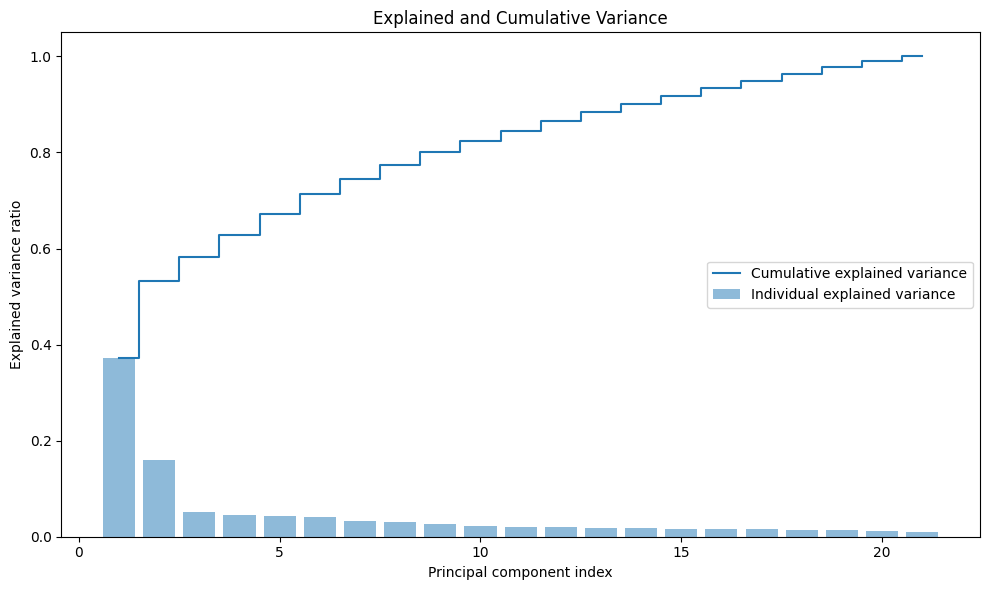

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

print("Explained Variance Ratio")
for i, r in enumerate(pca.explained_variance_ratio_):
  print(f"Attribute {i:2}: {r:.4f}")

plot_variance(pca.explained_variance_ratio_)

Бачимо, що на перші дві компоненти припадає більш ніж 50% дисперсії у наборі. Надалі використовуватимемо 2 компоненти.

Застосуємо Метод головних компонент на даних для 2 компонент, обчислимо точність класифікатора та побудуємо діаграми поверхонь рішень.

Train Accuracy: 0.8800
Test Accuracy: 0.8533


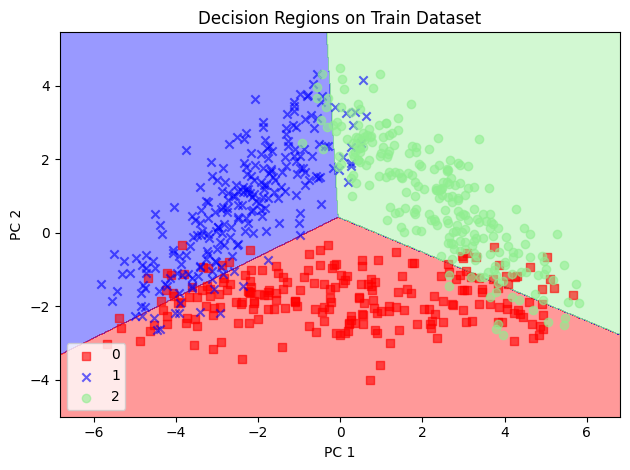

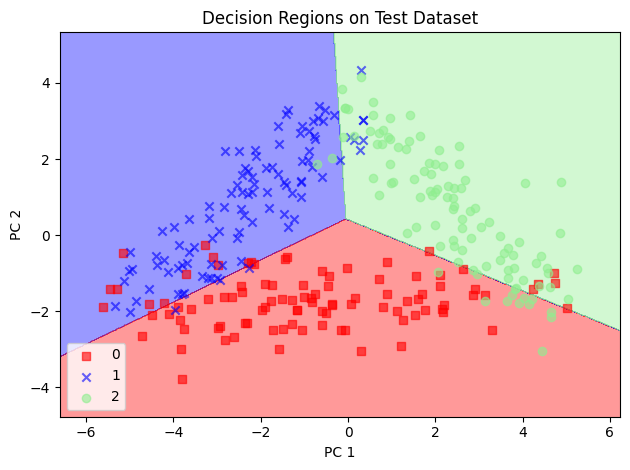

In [ ]:
pca = PCA(n_components=2)

scores = score_algorithm(pca, lr, X_train, y_train, X_test, y_test)

algorithms.append("PCA")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Зростаючий метод головних компонент (Incremental PCA) для 2 компонент, реалізований в scikit-learn python.

Train Accuracy: 0.8800
Test Accuracy: 0.8500


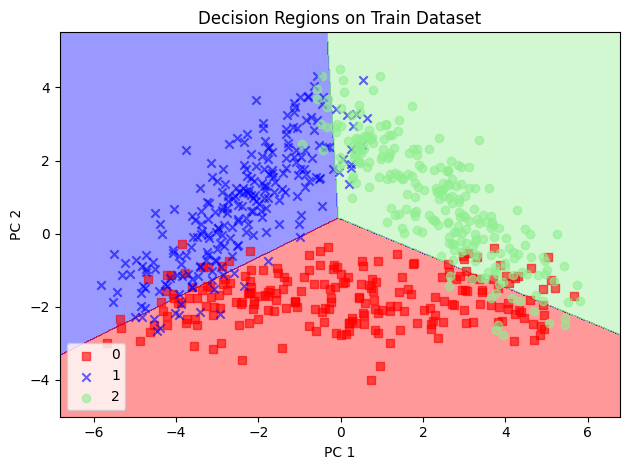

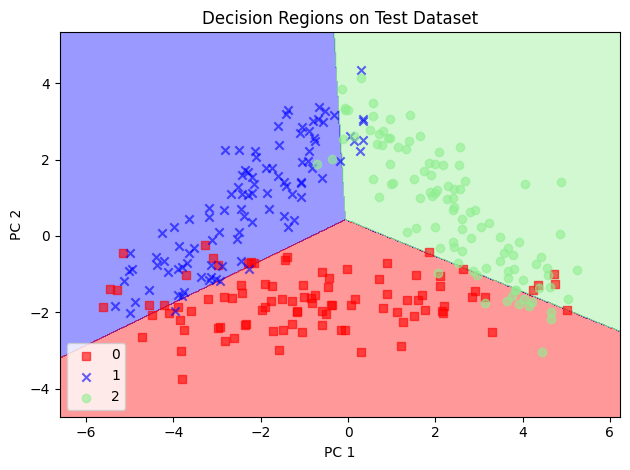

In [ ]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2)
scores = score_algorithm(ipca, lr, X_train, y_train, X_test, y_test)

algorithms.append("Incremental PCA")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи обидві версії Розрідженого методу головних компонент (SparsePCA та MiniBatchSparsePCA) для 2 компонент, реалізовані в scikit-learn python.

Train Accuracy: 0.8800
Test Accuracy: 0.8633


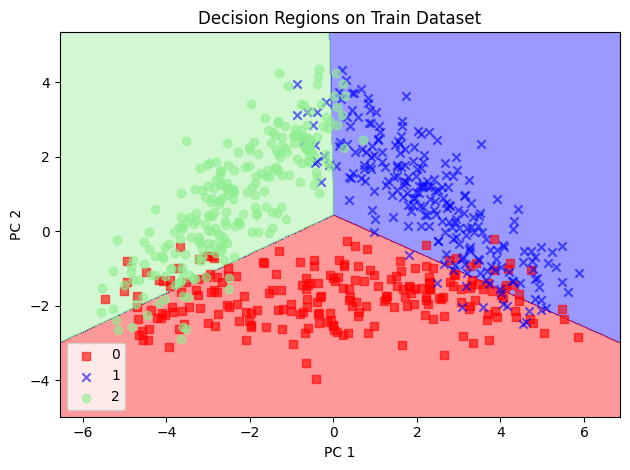

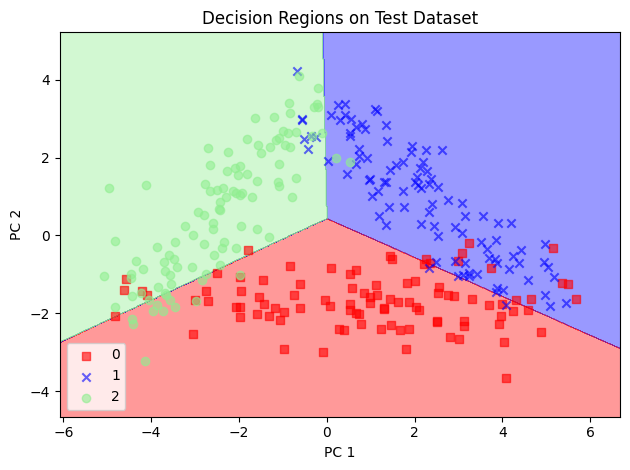

Train Accuracy: 0.8800
Test Accuracy: 0.8567


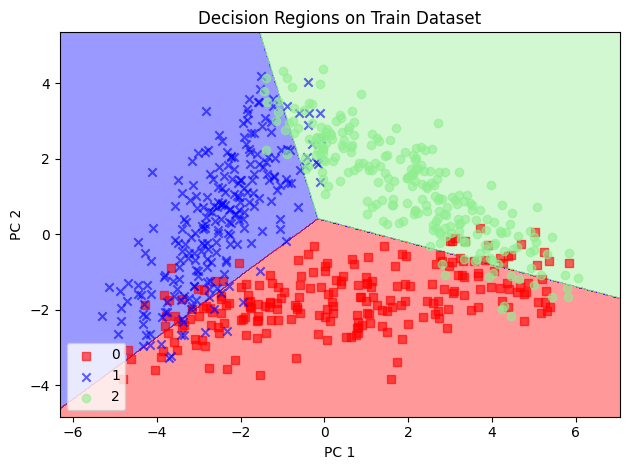

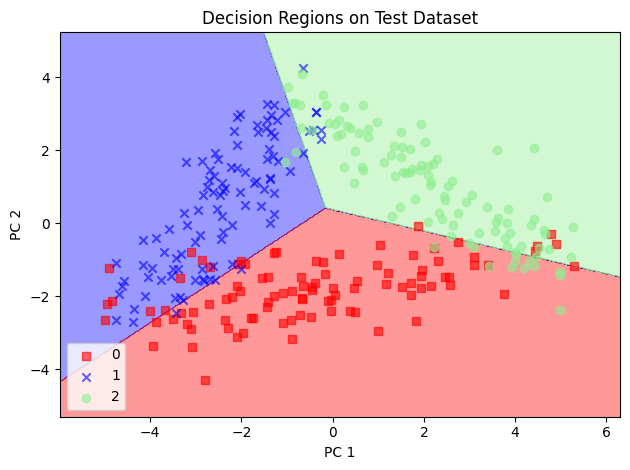

In [ ]:
from sklearn.decomposition import SparsePCA, MiniBatchSparsePCA

spca = SparsePCA(n_components=2)
scores = score_algorithm(spca, lr, X_train, y_train, X_test, y_test)

algorithms.append("Sparse PCA")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

mbspca = MiniBatchSparsePCA(n_components=2)
scores = score_algorithm(mbspca, lr, X_train, y_train, X_test, y_test)

algorithms.append("Mini Batch Sparse PCA")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Ядерний метод головних компонент (Kernel PCA) для 2 компонент, реалізований в scikit-learn python. Використаємо для нелінійного перетворення радіальну базисну функцію (RBF) з параметром gamma=0.005.

Train Accuracy: 0.8743
Test Accuracy: 0.8633


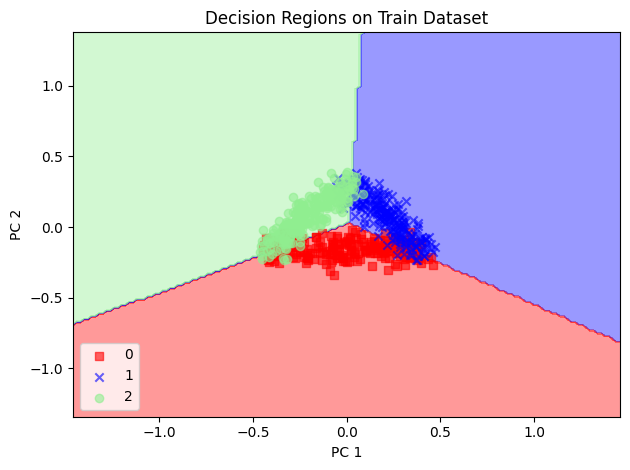

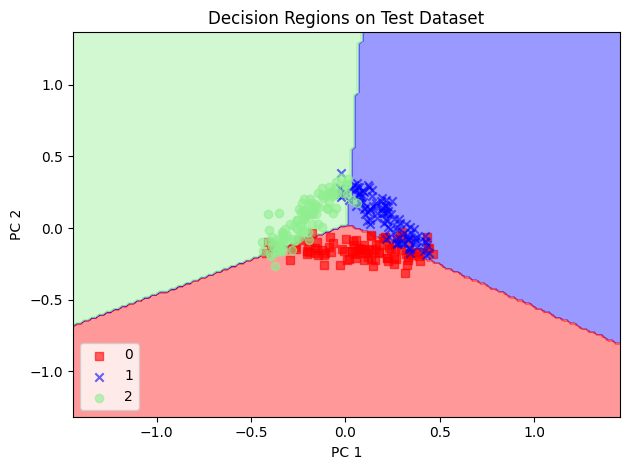

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.005)
scores = score_algorithm(kpca, lr, X_train, y_train, X_test, y_test)

algorithms.append("Kernel PCA")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Усічений SVD (Truncated singular value decomposition) для 2 компонент, реалізований в scikit-learn python.

Train Accuracy: 0.8800
Test Accuracy: 0.8533


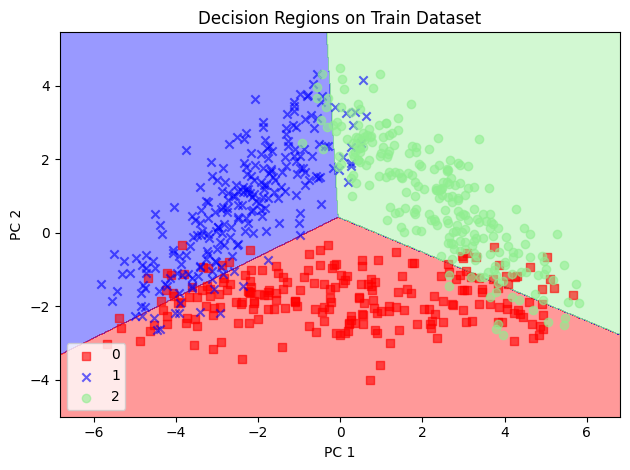

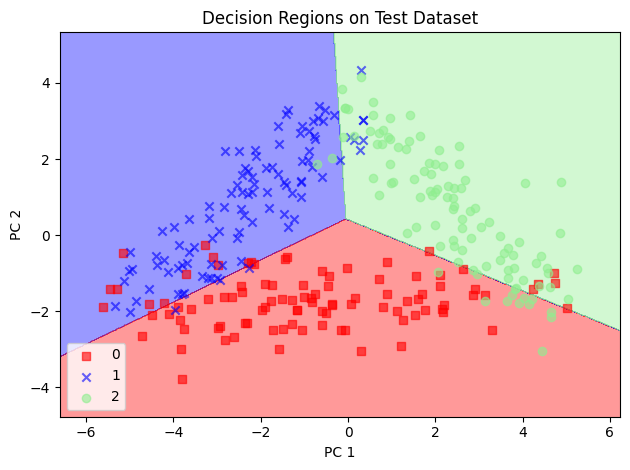

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
scores = score_algorithm(tsvd, lr, X_train, y_train, X_test, y_test)

algorithms.append("Truncated SVD")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Факторний аналіз (Factor Analysis, FA) для 2 компонент, реалізований в scikit-learn python.

Train Accuracy: 0.8829
Test Accuracy: 0.8467


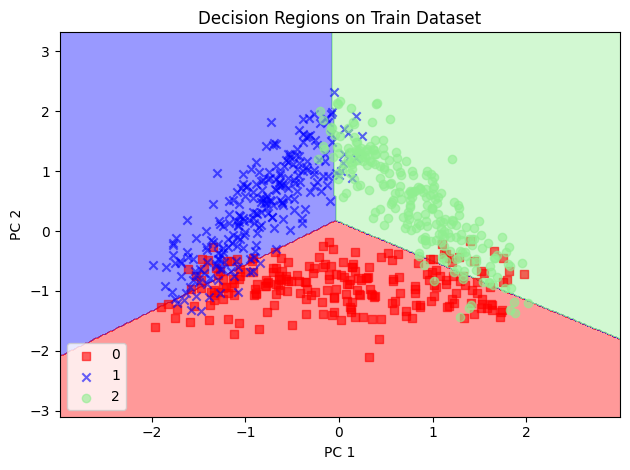

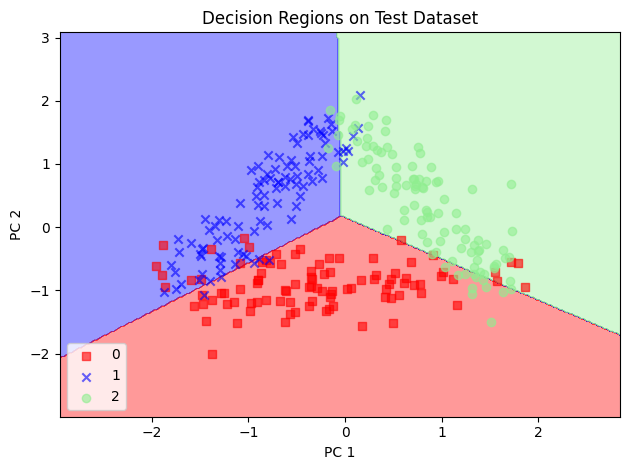

In [ ]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
scores = score_algorithm(fa, lr, X_train, y_train, X_test, y_test)

algorithms.append("Factor Analysis")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Аналіз незалежних компонент (Independent component analysis, ICA) для 2 компонент, реалізований в scikit-learn python.

Train Accuracy: 0.8800
Test Accuracy: 0.8567


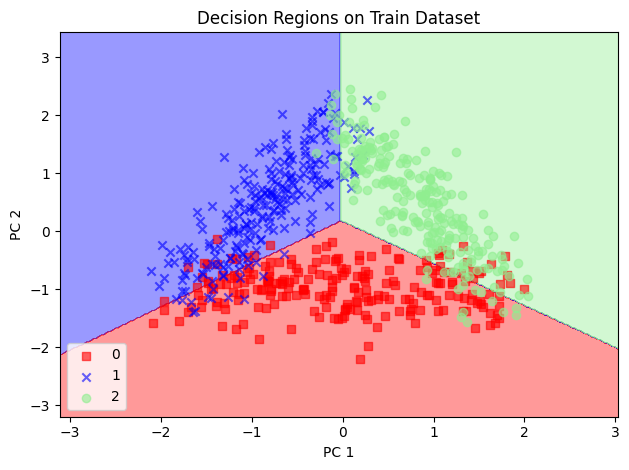

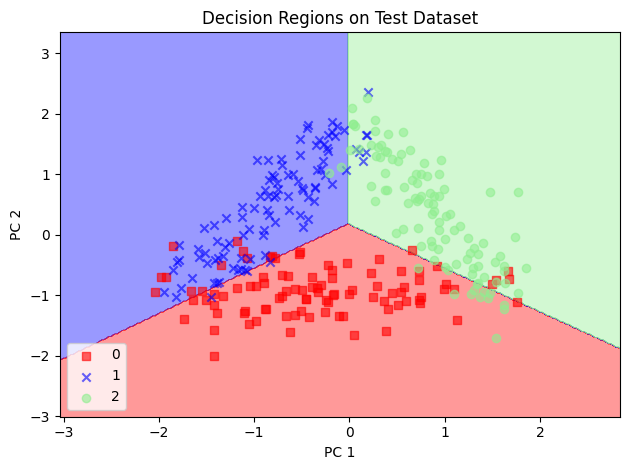

In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
scores = score_algorithm(ica, lr, X_train, y_train, X_test, y_test)

algorithms.append("ICA")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Лінійний дискримінантний аналіз (Linear Discriminant Analysis - задача навчання з вчителем) для 2 компонент, реалізований в scikit-learn python.

Train Accuracy: 0.8786
Test Accuracy: 0.8300


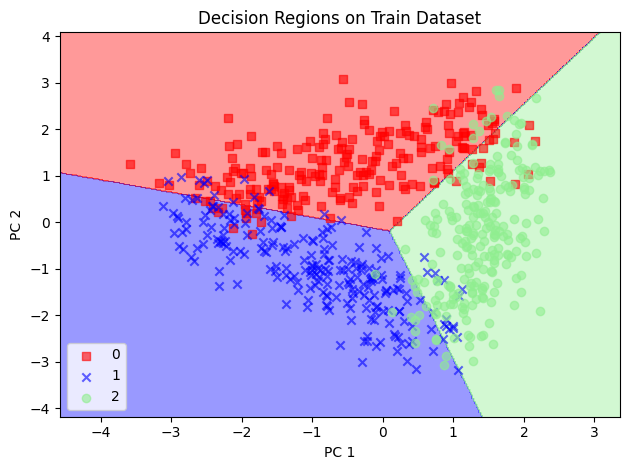

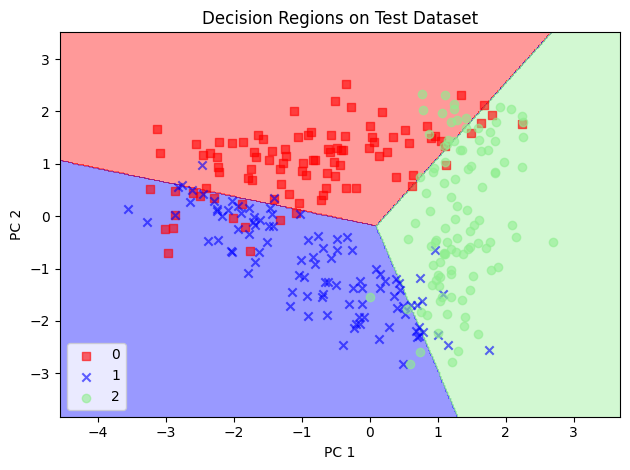

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

scores = score_algorithm(lda, lr, X_train, y_train, X_test, y_test,
                         mode="lda")

algorithms.append("Linear Discriminant Analysis")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

###Зниження розмірності набору даних з використанням Автокодувальників

Виконаємо зниження розмірності набору даних, використовуючи Автокодувальник з лінійними функціями активації.

Для отримання кодувальника, напишемо  функцію get_encoder.

In [ ]:
import tensorflow as tf
from tensorflow import keras

def get_encoder(X_train, X_test, linear=True, n_components=2,
                learning_rate=0.001, n_iterations=300):
  n_inputs = X_train.shape[1]
  activation = "linear" if linear else "tanh"

  encoder = keras.models.Sequential([
      keras.layers.InputLayer(shape=[n_inputs]),
      keras.layers.Dense(n_components, activation=activation)
  ])

  decoder = keras.models.Sequential([
      keras.layers.Dense(n_inputs, activation=activation)
  ])

  autoencoder = keras.models.Sequential([encoder, decoder])

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  autoencoder.compile(optimizer=optimizer, loss="mse")
  autoencoder.fit(X_train, X_train, epochs=n_iterations,
                  verbose=1, validation_data=(X_test, X_test))

  return encoder

Створимо та натренуємо Автокодувальник із лінійними функціями активації. У якості оптимізатора застосуємо Adam зі швидкістю навчання 0.001 та функцією втрат MSE. Тренуватимемо модель протягом 300 епох.

In [ ]:
lin_encoder = get_encoder(X_train, X_test)

Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3327 - val_loss: 1.2585
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2496 - val_loss: 1.1884
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2039 - val_loss: 1.1392
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1389 - val_loss: 1.1032
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1115 - val_loss: 1.0741
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0839 - val_loss: 1.0484
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0626 - val_loss: 1.0254
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0341 - val_loss: 1.0034
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0280 - val_loss: 0.9801
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9892 - val_loss: 0.9546
Epoch 11/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9462 - val_loss: 0.9249
Epoch 12/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

Оцінимо точність класифікатора на даних, отриманих із кодувальника з лінійною функцією активації.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Accuracy: 0.8800
Test Accuracy: 0.8533


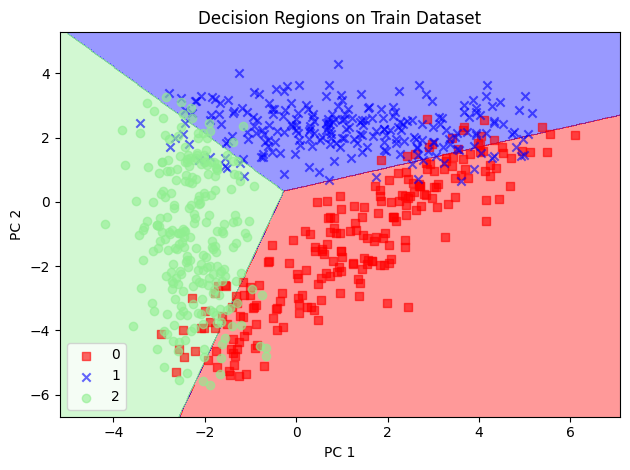

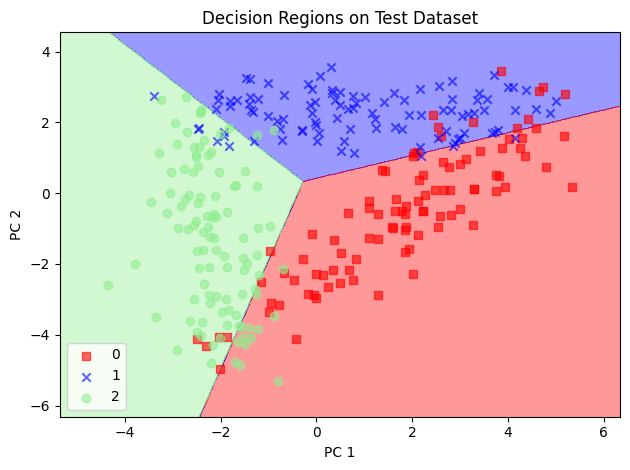

In [ ]:
scores = score_algorithm(lin_encoder, lr,
                         X_train, y_train, X_test, y_test,
                         mode="encoder")

algorithms.append("Autoencoder (linear activation)")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

Виконаємо зниження розмірності набору даних, використовуючи Автокодувальник з нелінійними функціями активації.

Створимо та натренуємо Автокодувальник із нелінійними функціями активації tanh. У якості оптимізатора застосуємо Adam зі швидкістю навчання 0.001 та функцією втрат MSE. Тренуватимемо модель протягом 300 епох.

In [ ]:
non_lin_encoder = get_encoder(X_train, X_test, linear=False)

Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.0635 - val_loss: 1.0369
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0533 - val_loss: 1.0098
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0151 - val_loss: 0.9869
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9679 - val_loss: 0.9677
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9848 - val_loss: 0.9498
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9771 - val_loss: 0.9327
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9661 - val_loss: 0.9155
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9121 - val_loss: 0.8979
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9031 - val_loss: 0.8796
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8590 - val_loss: 0.8611
Epoch 11/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8709 - val_loss: 0.8418
Epoch 12/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

Оцінимо точність класифікатора на даних, отриманих із кодувальника з нелінійною функцією активації tanh.

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Accuracy: 0.8729
Test Accuracy: 0.8433


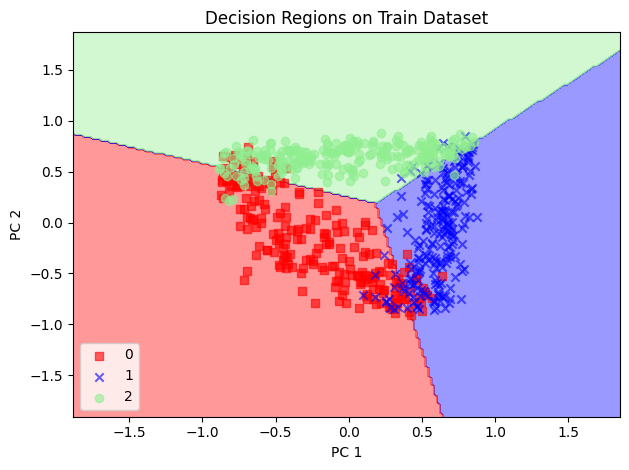

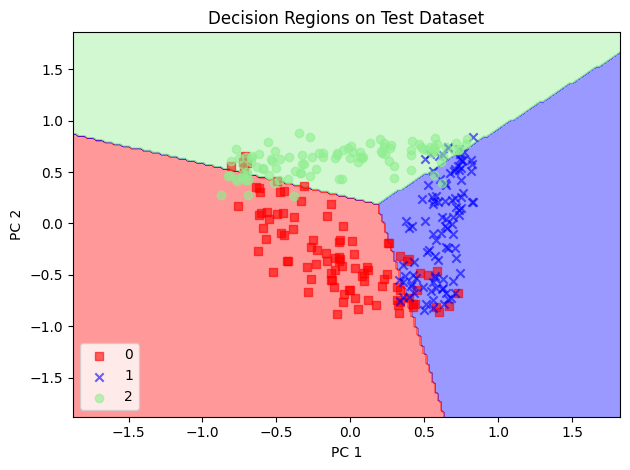

In [ ]:
scores = score_algorithm(non_lin_encoder, lr,
                         X_train, y_train, X_test, y_test,
                         mode="encoder")

algorithms.append("Autoencoder (non-linear activation)")
train_accuracies.append(scores[0])
test_accuracies.append(scores[1])

###Порівняння результатів за різними алгоритмами

Для порівняння результатів також отримаємо значення точності класифікатора при застосуванні всіх ознак.

In [ ]:
scores = score_algorithm(None, lr,
                         X_train, y_train, X_test, y_test,
                         plot=False, mode="baseline")

algorithms.insert(0, "Baseline")
train_accuracies.insert(0, scores[0])
test_accuracies.insert(0, scores[1])

Train Accuracy: 0.8814
Test Accuracy: 0.8667


Побудуємо діаграму точності алгоритмів під час тренування та тестування.

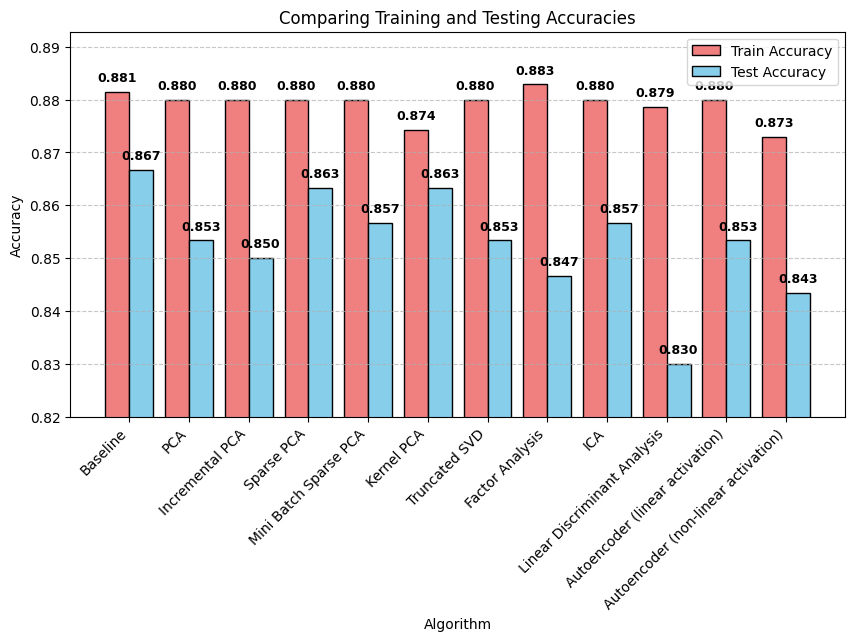

In [ ]:
plot_accuracy(algorithms, train_accuracies, test_accuracies)

Порівняння результатів класифікації на даних зі зменшеною розмірністю демонструє суттєвий вплив методів зменшення розмірності на точність моделі. Базова модель логістичної регресії без застосування таких методів показала найкращий результат: точність 0.8814 на тренувальному наборі та 0.8667 на тестовому. Це свідчить про те, що усі вихідні дані містять корисну інформацію для класифікації.

Методи головних компонент (PCA, Incremental PCA, Sparse PCA, Mini Batch Sparse PCA) призвели до незначного зниження точності. Найкращий результат серед них показав Sparse PCA (точність на тестовому наборі - 0.8633), що є найближчим до результату без застосування алгоритмів. Високу ефективність Sparse PCA можна пояснити здатністю цього методу відбирати найбільш значущі компоненти. Інші варіанти PCA, зокрема Incremental PCA (точність на тестовому наборі - 0.8500) та Mini Batch Sparse PCA (0.8567), мають дещо гірші показники, що може бути наслідком особливостей їх реалізації.

Kernel PCA з RBF-ядром також продемонстрував високий рівень точності (0.8633 на тестовому наборі), що підтверджує ефективність нелінійних перетворень при виявленні складних структур в даних.

Методи Truncated SVD та ICA мали гірші результати (точність на тестовому наборі 0.8467-0.8567), що може бути пов'язано з їхньою орієнтацією на пошук факторів, які не обов'язково відповідають найкращому розділенню класів. Лінійний дискримінантний аналіз (LDA) показав найгірший результат серед усіх досліджуваних методів (0.8300). Це може свідчити про те, що дані не зовсім відповідають припущенням методу або що дані мають нелінійну структуру.

Результати автокодувальників залежать від вибору функції активації. Лінійний автокодувальник досяг точності 0.8533 на тестовому наборі, що є близьким до результатів PCA та Truncated SVD. Це підтверджує подібність цих підходів, адже автокодувальник з лінійними функціями активації є еквівалентним PCA. Нелінійний автокодувальник із функцією активації tanh продемонстрував нижчу точність (0.8433 на тестовому наборі). Це можна пояснити тим, що репрезентація даних через нелінійну функцію робиться занадто складною; функція tanh також може призводити до затухання градієнтів.

##Висновок

У цій лабораторній роботі було проведено аналіз впливу методів зменшення розмірності на точність класифікації. Він демонструє, що базова модель логістичної регресії без зменшення розмірності показує найвищу точність, а методи PCA, Kernel PCA, Sparse PCA та автокодувальники можуть наблизити результати до початкових, хоча і помітне зменшення точності через втрату інформації.

Лінійний автокодувальник демонструє результати, дуже близькі до методу PCA, що підтверджує їхню математичну еквівалентність. Нелінійний автокодувальник із функцією активації tanh показав гірший результат, що може свідчити про занадто складну репрезентацію даних для цього набору.

Найкращі результати показали Sparse PCA та Kernel PCA, що пояснюється їхньою здатністю краще адаптуватися до особливостей даних. Методи факторного аналізу та LDA продемонстрували найгіршу точність, що може бути спричинено невідповідністю даних у наборі їхнім припущенням.

Отримані результати підтверджують, що вибір методу зменшення розмірності суттєво впливає на продуктивність моделі, і що оптимальний підхід залежить від особливостей даних та задачі.

##Джерело даних
Waveform Database Generator (Version 1) - UCI Repository. Доступно за посиланням: https://archive.ics.uci.edu/ml/datasets/Waveform+Database+Generator+%28Version+1%29.